In [1]:
import numpy as np
import torch  # type: ignore
import torch_geometric  # type: ignore
from torch_geometric.loader import DataLoader, ImbalancedSampler  # type: ignore
import networkx as nx
import os
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from omegaconf import OmegaConf

from src.dataset import PDataset  # type: ignore
from src.pytorchtools import seed_everything, pyg_stratified_split  # type: ignore

print(f"Cuda available: {torch.cuda.is_available()}")
initialize(version_base="1.3", config_path="src/vis_conf")
cfg=compose(config_name="config.yaml")

%matplotlib notebook

Cuda available: True


In [2]:
dataset = PDataset(cfg=cfg)
train_valid_dataset, train_valid_labels, test_dataset, test_labels \
    = pyg_stratified_split(dataset=dataset, labels=dataset.labels.squeeze().tolist(), fraction=0.9,
                           random_state=cfg['random_state'])
train_dataset, train_labels, valid_dataset, valid_labels \
    = pyg_stratified_split(dataset=train_valid_dataset, labels=train_valid_labels, fraction=0.7,
                           random_state=cfg['random_state'])

Processing...
100%|██████████| 105/105 [00:00<00:00, 146.55it/s]
Done!


In [3]:
data_list = [dataset.get(idx) for idx in range(len(dataset))]

In [5]:
data_list

[Data(x=[128, 1], edge_index=[2, 8128], y=[1, 1], edge_weight=[8128], graph_index='Id_1'),
 Data(x=[128, 1], edge_index=[2, 8128], y=[1, 1], edge_weight=[8128], graph_index='Id_2'),
 Data(x=[128, 1], edge_index=[2, 8128], y=[1, 1], edge_weight=[8128], graph_index='Id_3'),
 Data(x=[128, 1], edge_index=[2, 8128], y=[1, 1], edge_weight=[8128], graph_index='Id_4'),
 Data(x=[128, 1], edge_index=[2, 8128], y=[1, 1], edge_weight=[8128], graph_index='Id_5'),
 Data(x=[128, 1], edge_index=[2, 8128], y=[1, 1], edge_weight=[8128], graph_index='Id_6'),
 Data(x=[128, 1], edge_index=[2, 8128], y=[1, 1], edge_weight=[8128], graph_index='Id_7'),
 Data(x=[128, 1], edge_index=[2, 8128], y=[1, 1], edge_weight=[8128], graph_index='Id_8'),
 Data(x=[128, 1], edge_index=[2, 8128], y=[1, 1], edge_weight=[8128], graph_index='Id_9'),
 Data(x=[128, 1], edge_index=[2, 8128], y=[1, 1], edge_weight=[8128], graph_index='Id_10'),
 Data(x=[128, 1], edge_index=[2, 8128], y=[1, 1], edge_weight=[8128], graph_index='Id_11'

In [ ]:
global_batch_size = 1
train_sampler = ImbalancedSampler(train_dataset
                                  , num_samples=global_batch_size
                                  )

train_loader = DataLoader(train_dataset,
                          batch_size=global_batch_size,  # len(train_dataset),
                          shuffle=False,
                          sampler=train_sampler
                          )

In [14]:
G = nx.Graph()
g_idx = 0
G.add_nodes_from([node for node in range(len(data_list[g_idx].x))])

In [16]:
for i, j, w in zip(data_list[g_idx].edge_index.tolist()[0],
                  data_list[g_idx].edge_index.tolist()[1],
                  data_list[g_idx].edge_weight.tolist()):
    G.add_edge(i,j, weight=w)


In [22]:
g0 = torch_geometric.utils.to_networkx(data_list[3], edge_attrs=data_list[3].edge_attr.tolist())

AttributeError: 'NoneType' object has no attribute 'tolist'

In [ ]:
nx.draw_networkx(g0, with_labels=False)

In [17]:
nx.adjacency_matrix(G).todense()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02152065, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02152065, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<IPython.core.display.Javascript object>


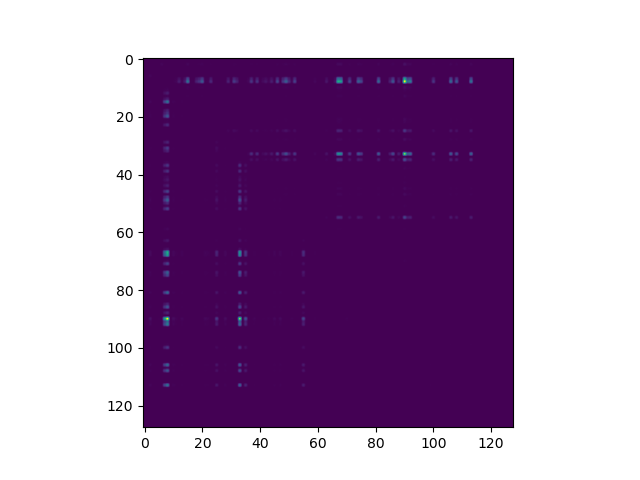

In [18]:
import matplotlib.pyplot as plt
import numpy as np

a = nx.adjacency_matrix(G).todense()
plt.imshow(a)
plt.show()

In [19]:
gg = torch_geometric.utils.from_networkx(G)

In [20]:
gg

Data(edge_index=[2, 16256], weight=[16256], num_nodes=128)

In [21]:
data_list[g_idx]

Data(x=[128, 1], edge_index=[2, 8128], y=[1, 1], edge_weight=[8128], graph_index='Id_1')

In [7]:
data_list[0]

Data(x=[128, 1], edge_index=[2, 8128], y=[1, 1], edge_weight=[8128], graph_index='Id_1')

In [5]:
s1 = torch_geometric.utils.to_dense_adj(data_list[0].edge_index, edge_attr=data_list[0].edge_weight)

In [9]:
s1.reshape([128, 128]) - s1

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(torch_geometric.utils.to_dense_adj(data_list[0].edge_index, edge_attr=data_list[0].edge_weight).reshape([128, 128]))
plt.imshow(torch_geometric.utils.to_dense_adj(data_list[3].edge_index, edge_attr=data_list[3].edge_weight).reshape([128, 128]))
plt.show()

In [16]:
data_list[3].y

tensor([[1]])